# 워드 클라우드 그리기 예제

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev


# to set data path
dataPath = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/'

# local data path
localdataPath = 'C:/YONG/m1710/myPydata/'

In [2]:
# wordcloud 설치 필요

# pip install wordcloud

<class 'dict'>


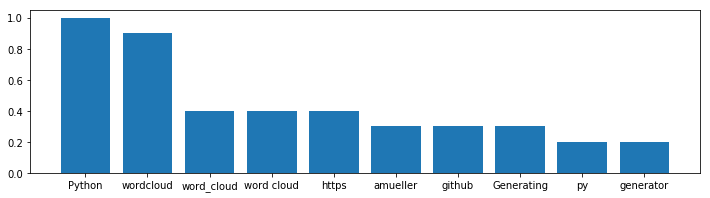

In [3]:
from wordcloud import WordCloud

# test_text.txt 파일에는 구글에서 python word cloud라고 검색해서 나온 내용들을 
# 연습용으로 저장
text = open(localdataPath + 'test_text.txt').read()

wordcloud = WordCloud().generate(text)
print(type(wordcloud.words_))
wordcloud.words_.values()

# word colud dictionary를 데이터프레임으로 변환
dfwcw01 = pd.DataFrame.from_dict(wordcloud.words_,orient='index').sort_values(0, ascending=False).head(10)

plt.figure(figsize=(12,3))
plt.bar(dfwcw01.index, dfwcw01[0])
plt.show()


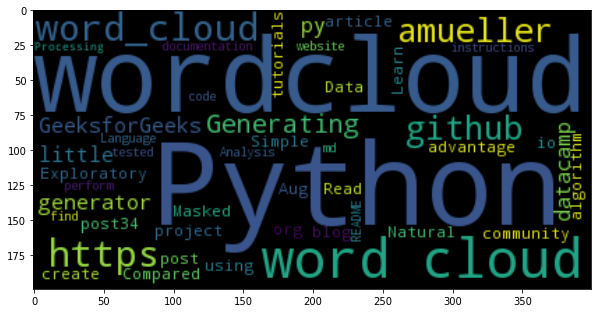

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off") # 축 보이지 않게 하는 명령
plt.show()

In [5]:
##  to check out .... for more
# https://www.datacamp.com/community/tutorials/wordcloud-python 
# https://pinkwink.kr/1029  한글 활용 내용 포함 (마스크 활용 포함)
# https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html

In [7]:
# 연습 :: 무작위 표본 추출 함수

import random

# 1에서 100 사이의 정수를 추출 -- 10번 반복
for x in range(5):
    print(x , " : ", random.randint(1, 10000)/100)

0  :  41.66
1  :  74.93
2  :  26.29
3  :  7.74
4  :  23.32


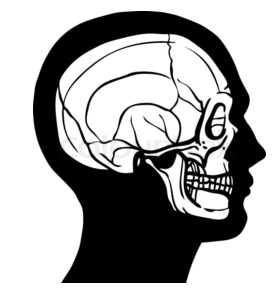

<class 'dict'>


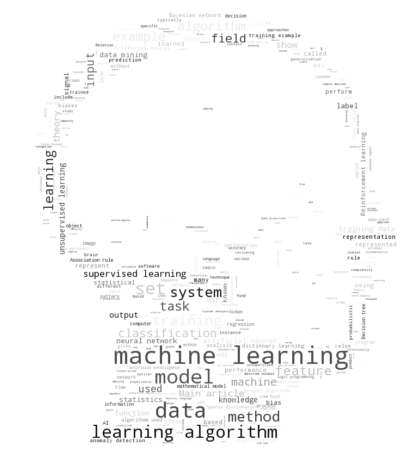

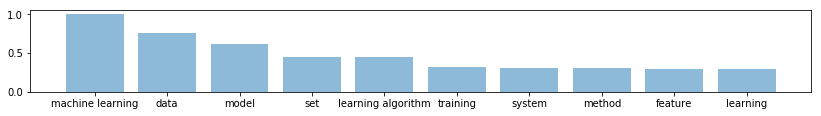

In [39]:
from wordcloud import WordCloud
from PIL import Image
import random

# 흑백 (모노톤) 색상으로 설정하는 사용자 정의 함수
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1, 100)



# test_text.txt 파일에는 구글에서 [machine learning] 을 검색해서 나온 내용들을 
# 연습용으로 저장
text = open(localdataPath + 'ML_text.txt').read()

# 미리 준비한 (구글 이미지 검색 등에서) 이미지를 사용해서 그 모양으로 워드클라우드 작성
ML_mask = np.array(Image.open(localdataPath + "human_head.jpg"))
plt.figure(figsize=(5,5))
plt.imshow(ML_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud(max_font_size=100, max_words=3000, mask=ML_mask, 
                      background_color="white").generate(text)

print(type(wordcloud.words_))


# word colud dictionary를 데이터프레임으로 변환
dfwcw01 = pd.DataFrame.from_dict(wordcloud.words_,orient='index').sort_values(0, ascending=False).head(10)

plt.figure(figsize=(14,8))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.show()


plt.figure(figsize=(14,1.5))
plt.bar(dfwcw01.index, dfwcw01[0], alpha=0.5)
plt.show()

- [참고] 한글로된 텍스트를 사용한 워드클라우드 작성은 이어지는 section에서 크롤링 결과를 사용해서 연습할 예정

### Word Embedding

- 단어들에 좌표를 부여 (= 벡터화)
- Word2Vec은 입력층과 출력층 사이에 hidden layer 대신 projection layer 하나만 존재하는 shallow NN
- CBOW는 주변단어들로부터 중심단어를 추측. Skipgram은 반대로 중심단어로 주변단어를 추측하는 방식
- W2V 는 NNLM(Neural Net Language 모델)의 느린 학습속도를 개선하고 다음 단어 대신 중심단어 의미를 수치화하는 것

- 한글 설명 on W2V :  https://wikidocs.net/22660

<class 'pandas.core.series.Series'>
0    엘라스틱, 머신러닝·보안 강화 엘라스틱스택 7.4 출시
1    로봇융합연·위세아이텍·남서울대, 로봇 산업 확대 MOU
Name: news_title, dtype: object
sentences_tag :  [('엘라스', 'Noun'), ('틱', 'Suffix'), (',', 'Punctuation'), ('머신', 'Noun'), ('러닝', 'Noun'), ('·', 'Foreign'), ('보안', 'Noun'), ('강화', 'Noun'), ('엘라스', 'Noun'), ('틱', 'Suffix'), ('스택', 'Noun'), ('7', 'Number'), ('.', 'Punctuation'), ('4', 'Number'), ('출시', 'Noun')]
[['엘라스', '머신', '러닝', '보안', '강화', '엘라스', '스택', '출시'], ['로봇', '융합', '위세', '아이', '남서울대', '로봇', '산업', '확대'], ['인터', '리핀', '머신', '러닝', '기반', '관계', '금융', '방식', '금융', '특허', '출원']] 400
:: W2V model created
:: 


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:81: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


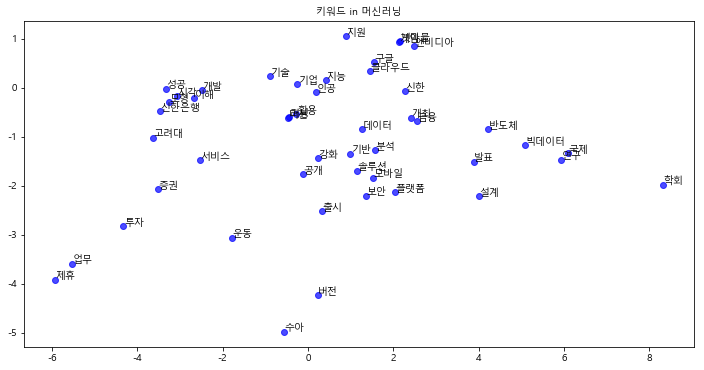

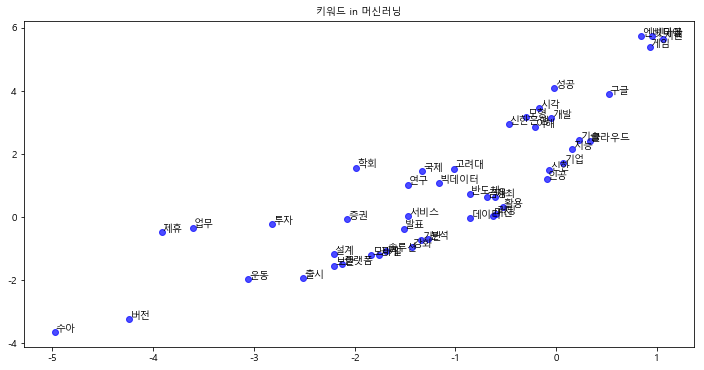

similarity between words
sim('머신', '러닝') 0.9980568
sim('빅데이터', '러닝') -0.366737


C:\Program Files\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,job,vec1,vec2,vec3
19,학회,8.321518,-1.9868357,1.5647037
46,국제,6.0873055,-1.3308707,1.4531221
15,연구,5.932174,-1.469229,1.0236511
28,빅데이터,5.093048,-1.1665914,1.0728832
47,반도체,4.225757,-0.852168,0.73457384


In [12]:
# Word2Vec using gensim 
###########################

import tensorflow as tf
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from gensim.models import Word2Vec
from gensim.models import doc2vec
from nltk.cluster import KMeansClusterer
from konlpy.tag import Twitter #  open source Korean tokenizer
# 토크나이저는 문자열을 원하는 구분자(delimiter)를 사용하여 분리 
import nltk # Natural Language Toolkit
import pylab


# matplotlib 에서 한글을 표시하기 위한 설정
font_name = matplotlib.font_manager.FontProperties(
                fname="c:/Windows/Fonts/malgun.ttf"  # 윈도우즈의 한글 폰트 위치를 지정
            ).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False #  음수를 나타내는 '-' 부호가 정상 표시되도록


# Import data
# csv file import example
# 한글 데이터의 경우 미리 인코딩을 UTF-8로 변경해두면 문제 발생 방지 

sentences = pd.read_csv(localdataPath +'MLnews_sample.csv').news_title
print(type(sentences))
print(sentences[:2])

min_count=10  # min frequency
iter=2000
# size=50  # num of dimension
size=3 
window=3  # skip gram window size - typical
sg=0 # use skipgram (1) ; 0 for CBOW


twitter = Twitter()
 
sentences_tag = []

sentencesa = sentences.tolist() # 리스트 형식으로 변환

# 단어별로 품사를 태그한 리스트 생성
for sentence in sentencesa:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
 
# 일부 단어 확인
print('sentences_tag : ', sentences_tag[0][:20])

noun_adj_list = []

# 의미상 불필요한 제거 대상 단어 목록 (불용어 = stopword)
# 제거하는 단어 리스트 구성에 따라 전체 결과가 달라짐
stopWords = ['러닝머신','기구', '런닝머신', '가구']

for sentence1 in sentences_tag:
    noun_adj_list_snt = []
    for word, tag in sentence1:
        # 명사와 형용사 두 가지 종류의 품사에 해당하는 단어만 포함
        # 한글자 길이의 단어는 무시
        if (tag in ['Noun', 'Adjective']) and (len(word)>1) and (word not in stopWords):
            noun_adj_list_snt.append(word)
    noun_adj_list.append(noun_adj_list_snt)        
print(noun_adj_list[:3] , len(noun_adj_list))

# 형태소분석기에 따라 서로 다른 결과 생성. 단어를 자르는 기준 등에 차이 -- 시행착오 불가피

w_sentences = noun_adj_list

model = Word2Vec(w_sentences, min_count=min_count, size=size, window=window, sg=sg, iter=iter)
print(":: W2V model created")
print(":: ")

X = model[model.wv.vocab]
vocab = list(model.wv.vocab.keys())
# print('vocab = \n', vocab)


fig, ax = plt.subplots(figsize=(12,6))
pylab.title('키워드 in 머신러닝', size=10)
plt.scatter(X[:,0], X[:,1], alpha=0.7, c="blue")
x = list(X[:,0])
y = list(X[:,1])
z = vocab
for i, txt in enumerate(z):
    ax.annotate(txt, (x[i]+0.01, y[i]+0.01), size=10)
plt.show()

fig, ax = plt.subplots(figsize=(12,6))
pylab.title('키워드 in 머신러닝', size=10)
plt.scatter(X[:,1], X[:,2], alpha=0.7, c="blue")
x = list(X[:,1])
y = list(X[:,2])
z = vocab
for i, txt in enumerate(z):
    ax.annotate(txt, (x[i]+0.01, y[i]+0.01), size=10)
plt.show()

# 이미지를 파일로 Export -- 해상도 조절
# fig.savefig(localdataPath + 'fig_word2vec001.png', dpi=200)
# print("[] fig saved")

# get similarity between words
print("similarity between words")

print("sim('머신', '러닝')", model.wv.similarity('머신', '러닝'))
print("sim('빅데이터', '러닝')", model.wv.similarity('빅데이터', '러닝'))


# 데이터프레임에 벡터 생성 결과 저장
df_senvoc = pd.DataFrame(np.column_stack([z, X[:,0], X[:,1], X[:,2]]),
     columns=["job","vec1","vec2","vec3"]) 
df_senvoc.sort_values('vec1', ascending=False)[:5]

- Word Embedding을 어디에 활용할 것인가? -- Map 자체로서도 가치있지만 단어(or Entity)를 수치화시켜 다른 모델 개발시 변수로 투입 가능
> 예1: 주식시장에서 종목별 관련뉴스로 부터 종목의 특성 수치화<br>
> 예2: 신용카드 가맹점에 대한 소셜 멘션으로 부터 가맹점 특성 수치화<br>
> 예3: 고객 클레임으로 부터 고객의 태도 수치화